In [13]:
#Importing packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

In [14]:
#Checking if GPU is available
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [15]:
#Loading the dataset
cifar10 = tf.keras.datasets.cifar10

#splitting into train test splits
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [16]:
print("Training set shape : ", x_train.shape)
print("Test set shape : ", x_test.shape)

Training set shape :  (50000, 32, 32, 3)
Test set shape :  (10000, 32, 32, 3)


50000 images in the training and 10000 in test set

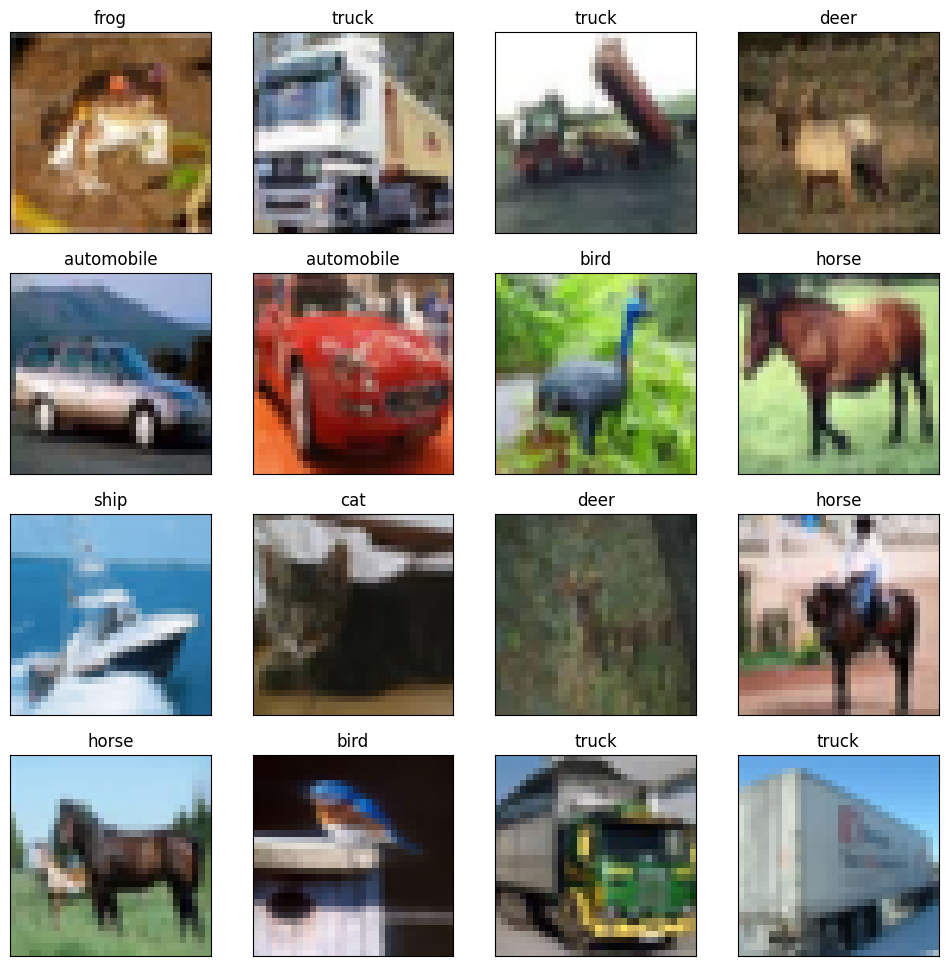

In [17]:
#classes in the dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(12,12))

#let us plot some images from train set

for i in range(16):
  # Creating  a subplot for each image
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    plt.imshow(x_train[i])

    plt.title(class_names[y_train[i][0]], fontsize=12)

plt.show()


In [18]:
# Convert to float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize the training set
x_train_min = x_train.min(axis=(0, 1, 2), keepdims=True)
x_train_max = x_train.max(axis=(0, 1, 2), keepdims=True)
x_train_normalized = (x_train - x_train_min) / (x_train_max - x_train_min)


# Normalize the test set using training set statistics
x_test_normalized = (x_test - x_train_min) / (x_train_max - x_train_min)

print(x_train_normalized.shape)
print(x_test_normalized.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [19]:
from tensorflow.keras import layers, models

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25) , # Dropout layer to prevent overfitting
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  # Output layer with 10 classes

], name = "CNN_model")
# Compile the model with suitable loss function and optimizer
model.compile(optimizer="Adam",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.summary()

Model: "CNN_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 16, 16, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                    

In [20]:
# Fit the CNN model on the training set
history = model.fit(x_train_normalized, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.1)  # Use 10% of training data as validation

# Evaluate the CNN model on the test set
test_loss, test_accuracy = model.evaluate(x_test_normalized, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/10
352/352 [==============================] - 264s 739ms/step - loss: 1.5526 - accuracy: 0.4466 - val_loss: 1.5572 - val_accuracy: 0.5684
Epoch 2/10
352/352 [==============================] - 248s 705ms/step - loss: 1.1435 - accuracy: 0.5986 - val_loss: 0.9354 - val_accuracy: 0.6808
Epoch 3/10
352/352 [==============================] - 247s 701ms/step - loss: 1.0100 - accuracy: 0.6472 - val_loss: 1.0340 - val_accuracy: 0.6526
Epoch 4/10
352/352 [==============================] - 243s 690ms/step - loss: 0.9400 - accuracy: 0.6761 - val_loss: 0.8930 - val_accuracy: 0.6884
Epoch 5/10
352/352 [==============================] - 249s 709ms/step - loss: 0.8895 - accuracy: 0.6926 - val_loss: 0.7960 - val_accuracy: 0.7318
Epoch 6/10
352/352 [==============================] - 248s 704ms/step - loss: 0.8429 - accuracy: 0.7073 - val_loss: 0.7684 - val_accuracy: 0.7342
Epoch 7/10
352/352 [==============================] - 241s 685ms/step - loss: 0.8017 - accuracy: 0.7196 - val_loss: 0.7574 -

313/313 [==============================] - 14s 45ms/step


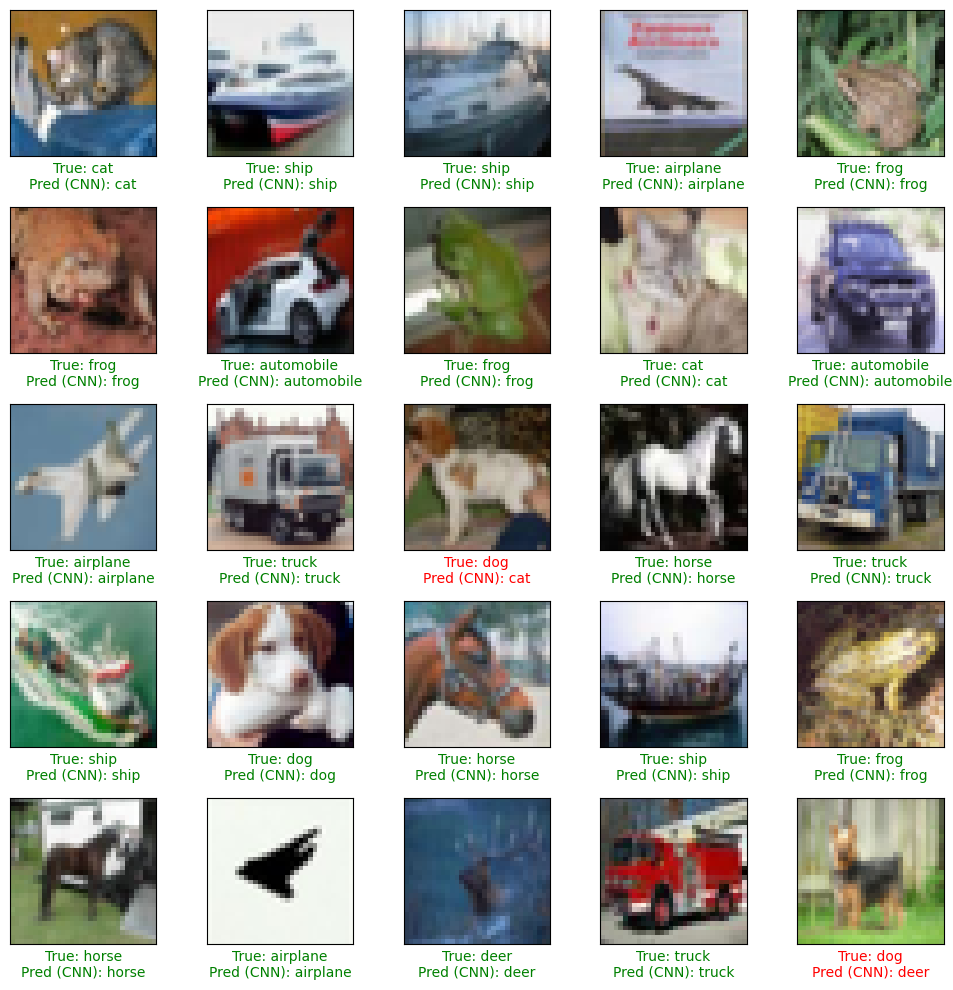

In [21]:
# Get predictions for the test set
predictions_cnn = model.predict(x_test_normalized)
predicted_labels_cnn = np.argmax(predictions_cnn, axis=1)

# Plot sample images with predicted labels
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test_normalized[i])  # Plot original image
    true_label = class_names[y_test[i][0]]  # Get true label
    predicted_label = class_names[predicted_labels_cnn[i]]  # Get predicted label
    if true_label == predicted_label:
        color = 'green'  # Correct prediction
    else:
        color = 'red'  # Incorrect prediction
    plt.xlabel(f"True: {true_label}\nPred (CNN): {predicted_label}", color=color)
plt.tight_layout()  # Adjust subplot layout to prevent overlap
plt.show()

In [22]:
# x_test_normalized[0]
def preprocess_image(image):
    np.reshape(image ,(32,32,3))
    image = (image - x_train_min) / (x_train_max - x_train_min)

    return image
image = preprocess_image(x_test_normalized[0])
image.shape
predictions_1 = model.predict(image)
# predicted_labels_1 = np.argmax(predictions_1, axis=1)
# predicted_labels_1
predictions_1
sorted_indices =  np.sort(predictions_1, axis=None, kind='quicksort')[::-1]
# sorted_indices
for idx in sorted_indices:
  print(idx)

1/1 [==============================] - 0s 49ms/step
0.67026955
0.14227208
0.13547608
0.030377988
0.008027035
0.005022433
0.0044156313
0.0030163624
0.0008217402
0.000301087


(208, 243, 3)
1/1 [==============================] - 0s 34ms/step
Class: airplane, Probability: 0.0005112666985951364
Class: automobile, Probability: 1.2055460501869675e-05
Class: bird, Probability: 0.09703703224658966
Class: cat, Probability: 0.0023766271770000458
Class: deer, Probability: 0.8892002105712891
Class: dog, Probability: 0.0018473357195034623
Class: frog, Probability: 0.006839583162218332
Class: horse, Probability: 0.0019721388816833496
Class: ship, Probability: 0.00015616339806001633
Class: truck, Probability: 4.7725352487759665e-05


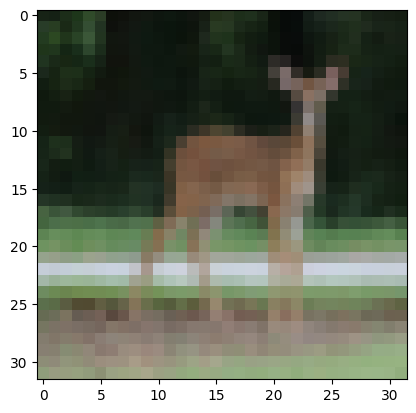

In [23]:
#testing for new/ unseen image

from PIL import Image
from skimage.transform import resize

#open the image usig Image
img = Image.open("/content/deer.jpeg")
img = np.array(img)

#display image with shape
print(img.shape)
plt.imshow(img)

#resizing image to same size as in dataset using resize function
image = resize(img,(32,32,3), anti_aliasing=True)
image.shape
plt.imshow(image)

#getting predictions on single image
predictions_single = model.predict(np.reshape(image,(1,32,32,3)))

#printing results
results = []
for probabilities in (predictions_single):
        for i in range(10):
            class_name = class_names[i]
            prob = probabilities[i].item()
            print(f"Class: {class_name}, Probability: {prob}")
            results.append((class_name, prob))

In [26]:
# !pip install gradio

In [27]:
import gradio as gr
from PIL import Image
from skimage.transform import resize


# Define a function to preprocess the image
def preprocess_image(image):
    image = np.array(image)
    print(image.shape)
    # plt.imshow(image)
    image = resize(image,(32,32,3), anti_aliasing=True)
    print(image.shape)
    return image

# Define the prediction function
def predict(image):

    image = preprocess_image(image)

    predictions_single = model.predict(np.reshape(image,(1,32,32,3)))

    # Get the predicted probabilities for each class
    results = []
    for probabilities in (predictions_single):
        for i in range(10):
            class_name = class_names[i]
            prob = probabilities[i].item()
            print(f"Class: {class_name}, Probability: {prob}")
            results.append((class_name, prob))

    return {class_name: prob for class_name, prob in results}

#uncommnet to test for your image
# img = Image.open("/content/aeroplane.jpeg")

# # plt.imshow(image)
# # res = predict(image)
# # res

# Create Gradio interface
iface = gr.Interface(predict,
                     inputs="image",
                     outputs="label",
                     title=" Image Classifier on CIFAR-10 dataset",
                     description="Classify images into one of 10 classes: Airplane, Automobile, Bird, Cat, Deer, Dog, Frog, Horse, Ship, Truck")
iface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://00738971df45a872f1.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
